## Melchizedek Ackah-Blay

December 9, 2024

**Insurance Investigation**

*load data*

In [34]:
df = pd.read_csv(r'/Users/melki/Desktop/insurance.csv')

*sample data*

In [35]:
df.sample(4)

age     sex    bmi  children smoker     region     charges
304    57  female  38.00         2     no  southwest  12646.2070
1009   51    male  27.74         1     no  northeast   9957.7216
37     26    male  20.80         0     no  southwest   2302.3000
654    59  female  35.20         0     no  southeast  12244.5310

*shape of data set*

In [36]:
df.shape

(1338, 7)

*summary information*

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*summary statistics of numerical values*

In [38]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

*null values investigation*

In [39]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

*duplicated values investigation*

In [40]:
df.duplicated().sum()

1

In [41]:
df.drop_duplicates(inplace = True)

*new shape*

In [42]:
df.shape

(1337, 7)

*x and y split*

In [180]:
x = df[['age', 'sex', 'bmi', 'smoker', 'children', 'region']]
y = df['charges']

*encoding categorical x variables*

In [181]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
x['sex'] = encoder.fit_transform(x['sex'])
x['smoker'] = encoder.fit_transform(x['smoker'])
x['region'] = encoder.fit_transform(x['region'])
x['children'] = encoder.fit_transform(x['children'])

*train and test split*

In [182]:
from sklearn.model_selection import train_test_split as t
x_train, x_test, y_train, y_test = t(x, y, test_size = 0.2, random_state = 0)

*scaling x values*

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

***evaluator**: this function will evaluate the ML models to find the best model*

In [184]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

def evaluator(predictions):
    print(f'mean squared error: {round(mean_squared_error(y_test, predictions),4)}')
    print(f'root mean squared error: {round(math.sqrt(mean_squared_error(y_test, predictions)),4)}')
    print(f'mean absolute error: {round(mean_absolute_error(y_test, predictions),4)}')
    print(f'r²: {round(r2_score(y_test, predictions),4)}')

*training 1st model: **linear regression***

In [185]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train_scaled, y_train)

LinearRegression()

*making predictions with **linear regresssion***

In [186]:
linear_regression_preds = linear_regression_model.predict(x_test_scaled)

*evaluating **linear regression model***

In [187]:
linear_regression_results = evaluator(linear_regression_preds)
linear_regression_results

mean squared error: 41874918.9293
root mean squared error: 6471.0833
mean absolute error: 4413.5166
r²: 0.7511


#
*training 2nd model: **support vector regressor***

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
p1 = {
    'kernel':['linear', 'rbf', 'poly'],
    'C':[0.001, 0.01, 0.1, 1],
    'degree':[2, 3, 4, 5, 6],
    'gamma':['scale', 'auto']
}
support_vector_model = GridSearchCV(SVR(), param_grid = p1)
support_vector_model.fit(x_train_scaled, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'degree': [2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

*making predictions with **support vector regressor***

In [189]:
support_vector_preds = support_vector_model.predict(x_test_scaled)

*looking at the **support vector regressor**'s best parameters*

In [190]:
support_vector_model.best_params_

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

*evaluating **support vector regressor***

In [191]:
support_vector_results = evaluator(support_vector_preds)
support_vector_results

mean squared error: 175057917.5608
root mean squared error: 13230.9455
mean absolute error: 8649.5962
r²: -0.0406


#
*training 3rd model: **random forest regressor - 1***

In [192]:
from sklearn.ensemble import RandomForestRegressor
p2 = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest_model = GridSearchCV(RandomForestRegressor(), param_grid = p2)
random_forest_model.fit(x_train_scaled, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]})

*making predictions with **random forest regressor - 1***

In [193]:
random_forest_preds = random_forest_model.predict(x_test_scaled)

*looking at the **random forest regressor - 1**'s best parameters*

In [194]:
random_forest_model.best_params_

{'max_depth': 40,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

*evaluating **random forest regressor - 1***

In [195]:
random_forest_results = evaluator(random_forest_preds)
random_forest_results

mean squared error: 26602835.4218
root mean squared error: 5157.7937
mean absolute error: 2907.355
r²: 0.8419


#
*training 4th model: **random forest regressor - 2***

In [196]:
p3 = {
    'n_estimators': [45, 50, 55, 60],
    'max_depth': [9, 10, 12, 15],
    'min_samples_split': [9, 10, 12, 15],
    'min_samples_leaf': [3, 4, 5]
}

random_forest_model2 = GridSearchCV(RandomForestRegressor(), param_grid = p3)
random_forest_model2.fit(x_train_scaled, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 10, 12, 15],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [9, 10, 12, 15],
                         'n_estimators': [45, 50, 55, 60]})

*making predictions with **random forest regressor - 2***

In [197]:
random_forest_preds2 = random_forest_model2.predict(x_test_scaled)

*looking at the **random forest regressor - 2**'s best parameters*

In [198]:
random_forest_model2.best_params_

{'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 45}

*evaluating **random forest regressor - 2***

In [199]:
random_forest_results2 = evaluator(random_forest_preds2)
random_forest_results2

mean squared error: 26414906.1163
root mean squared error: 5139.5434
mean absolute error: 2914.8242
r²: 0.843


#
*training 5th model: **adaptive boost regressor***

In [200]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

p4 = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential'],
    'base_estimator': [
        DecisionTreeRegressor(max_depth = 3),
        DecisionTreeRegressor(max_depth = 5),
        DecisionTreeRegressor(max_depth = 10)
    ]
}

adaptive_boost_model = GridSearchCV(AdaBoostRegressor(), param_grid = p4)
adaptive_boost_model.fit(x_train_scaled, y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=3),
                                            DecisionTreeRegressor(max_depth=5),
                                            DecisionTreeRegressor(max_depth=10)],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 200, 500]})

*making predictions with **adaptive boost regressor***

In [201]:
adaptive_boost_preds = adaptive_boost_model.predict(x_test_scaled)

*looking at the **adaptive boost regressor**'s best parameters*

In [202]:
adaptive_boost_model.best_params_

{'base_estimator': DecisionTreeRegressor(max_depth=5),
 'learning_rate': 0.01,
 'loss': 'exponential',
 'n_estimators': 100}

*evaluating **adaptive boost regressor***

In [203]:
adaptive_boost_results = evaluator(adaptive_boost_preds)
adaptive_boost_results

mean squared error: 26872279.3069
root mean squared error: 5183.8479
mean absolute error: 3086.5827
r²: 0.8403


#
*training 6th model: **gradient boosting regressor***

In [204]:
from sklearn.ensemble import GradientBoostingRegressor

p6 = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}


gradient_boost_model = GridSearchCV(GradientBoostingRegressor(), param_grid = p6)
gradient_boost_model.fit(x_train_scaled, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]})

*making predictions with **gradient boosting regressor***

In [205]:
gradient_boost_preds = gradient_boost_model.predict(x_test_scaled)

*looking at the **gradient boosting regressor**'s best parameters*

In [206]:
gradient_boost_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 500}

*evaluating **gradient boosting regressor***

In [207]:
gradient_boost_results = evaluator(gradient_boost_preds)
gradient_boost_results

mean squared error: 25958727.0386
root mean squared error: 5094.9708
mean absolute error: 2908.023
r²: 0.8457


#
*training 7th model: **historic gradient boosting regressor***

In [208]:
from sklearn.ensemble import HistGradientBoostingRegressor

p7 = {
    'learning_rate': [0.01, 0.015, 0.0175, 0.02],
    'max_depth': [None, 3, 5, 10],
    'l2_regularization': [0, 0.1, 0.5, 1.0],
    'min_samples_leaf': [10, 20, 50]
}


historic_gradient_boost_model = GridSearchCV(HistGradientBoostingRegressor(), param_grid = p7)
historic_gradient_boost_model.fit(x_train_scaled, y_train)

GridSearchCV(estimator=HistGradientBoostingRegressor(),
             param_grid={'l2_regularization': [0, 0.1, 0.5, 1.0],
                         'learning_rate': [0.01, 0.015, 0.0175, 0.02],
                         'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [10, 20, 50]})

*making predictions with **historic gradient boosting regressor***

In [209]:
historic_gradient_boost_pred = historic_gradient_boost_model.predict(x_test_scaled)

*looking at the **historic gradient boosting regressor**'s best parameters*

In [210]:
historic_gradient_boost_model.best_params_

{'l2_regularization': 0,
 'learning_rate': 0.02,
 'max_depth': 5,
 'min_samples_leaf': 20}

*evaluating **historic gradient boosting regressor***

In [211]:
historic_gradient_boost_results = evaluator(historic_gradient_boost_pred)
historic_gradient_boost_results

mean squared error: 28664311.7754
root mean squared error: 5353.9062
mean absolute error: 3531.0304
r²: 0.8296


#
*training 8th model: **categorical boosting regressor***

In [265]:
from catboost import CatBoostRegressor

p8 = {
    'learning_rate': [0.01, 0.02, 0.1],
    'depth': [4, 6, 8, 10], 
}


cat_boost_model = GridSearchCV(CatBoostRegressor(), param_grid = p8)
cat_boost_model.fit(x_train_scaled, y_train)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
0:	learn: 11863.7633297	total: 2.41ms	remaining: 2.41s
1:	learn: 11781.6142679	total: 2.65ms	remaining: 1.32s
2:	learn: 11694.8807248	total: 2.84ms	remaining: 944ms
3:	learn: 11608.3178478	total: 3.02ms	remaining: 753ms
4:	learn: 11526.1739962	total: 3.23ms	remaining: 643ms
5:	learn: 11437.3618717	total: 3.4ms	remaining: 563ms
6:	learn: 11355.5346636	total: 3.59ms	remaining: 510ms
7:	learn: 11269.3039253	total: 3.76ms	remaining: 466ms
8:	learn: 11192.0075002	total: 3.97ms	remaining: 437ms
9:	learn: 11110.9314778	total: 4.19ms	remaining: 415ms
10:	learn: 11045.6304852	total: 4.33ms	remaining: 389ms
11:	learn: 10967.4766176	total: 4.55ms	remaining: 375ms
12:	learn: 10888.1726450	total: 4.73ms	remaining: 359ms
13:	learn: 10807.9527291	total: 4.91ms	remaining: 346ms
14:	learn: 10739.4083239	total: 5.07ms	remaining: 333ms
15:	learn: 10665.

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x16e16a790>,
             param_grid={'depth': [4, 6, 8, 10],
                         'learning_rate': [0.01, 0.02, 0.1]})

*making predictions with **categorical boosting regressor***

In [213]:
cat_boost_pred = cat_boost_model.predict(x_test_scaled)

*looking at the **categorical boosting regressor**'s best parameters*

In [214]:
cat_boost_model.best_params_

{'depth': 4, 'learning_rate': 0.01}

*evaluating **categorical boosting regressor***

In [215]:
cat_boost_results = evaluator(cat_boost_pred)
cat_boost_results

mean squared error: 24604530.1137
root mean squared error: 4960.2954
mean absolute error: 2801.5183
r²: 0.8537


#
*training 9th model: **light gradient boosting regressor***

In [266]:
from lightgbm import LGBMRegressor

p9 = {
    'learning_rate': [0.01, 0.005, 0.02, 0.1], 
    'n_estimators': [100,300, 400, 500, 600]
}


light_boost_model = GridSearchCV(LGBMRegressor(verbose = 1), param_grid = p9)
light_boost_model.fit(x_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 855, number of used features: 6
[LightGBM] [Info] Start training from score 13254.344978
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 321
[LightGBM] [Info] Number of data points in the train set: 855, number of used features: 6
[LightGBM] [Info] Start training from score 13304.710381
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Inf

GridSearchCV(estimator=LGBMRegressor(verbose=1),
             param_grid={'learning_rate': [0.01, 0.005, 0.02, 0.1],
                         'n_estimators': [100, 300, 400, 500, 600]})

*making predictions with **light gradient boosting regressor***

In [217]:
light_boost_pred = light_boost_model.predict(x_test_scaled)

*looking at the **light gradient boosting regressor**'s best parameters*

In [218]:
light_boost_model.best_params_

{'learning_rate': 0.005, 'n_estimators': 600}

*evaluating **light gradient boosting regressor***

In [219]:
light_boost_results = evaluator(light_boost_pred)
light_boost_results

mean squared error: 26892903.069
root mean squared error: 5185.8368
mean absolute error: 3038.6448
r²: 0.8401


#
*training 10th model: **extreme gradient boosting regressor***

In [220]:
from xgboost import XGBRegressor

p10 = {
   'learning_rate': [0.01, 0.005, 0.02, 0.1], 
}

xg_boost_model = GridSearchCV(XGBRegressor(), param_grid = p10)
xg_boost_model.fit(x_train_scaled, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.005, 0.02, 0.1]})

*making predictions with **extreme gradient boosting regressor***

In [221]:
xg_boost_pred = xg_boost_model.predict(x_test_scaled)

*looking at the **extreme gradient boosting regressor**'s best parameters*

In [222]:
xg_boost_model.best_params_

{'learning_rate': 0.02}

*evaluating **extreme gradient boosting regressor***

In [223]:
xg_boost_results = evaluator(xg_boost_pred)
xg_boost_results

mean squared error: 176816463.0658
root mean squared error: 13297.2352
mean absolute error: 7876.2235
r²: -0.051


#
## CHOOSING THE BEST MODEL

The Categorical Boosting Regressor is by far **THE BEST** of the 10 Models

- It has the **lowest Mean Squared Error**, indicating better performance as it minimizes the squared difference between predicted and actual values

- It has the **lowest Root Mean Squared Error**, which suggests that its predictions are closer to the actual values.

- It has the **lowest Mean Absolute Error**, indicating that on average, its predictions are closer to the true values.

- It has the **highest R-Squared** value which means it explains a higher proportion of the variance in the target variable.

#
## FEATURE IMPORTANCE OF THE BEST MODEL: CATEGORICAL BOOSTING REGRESSOR

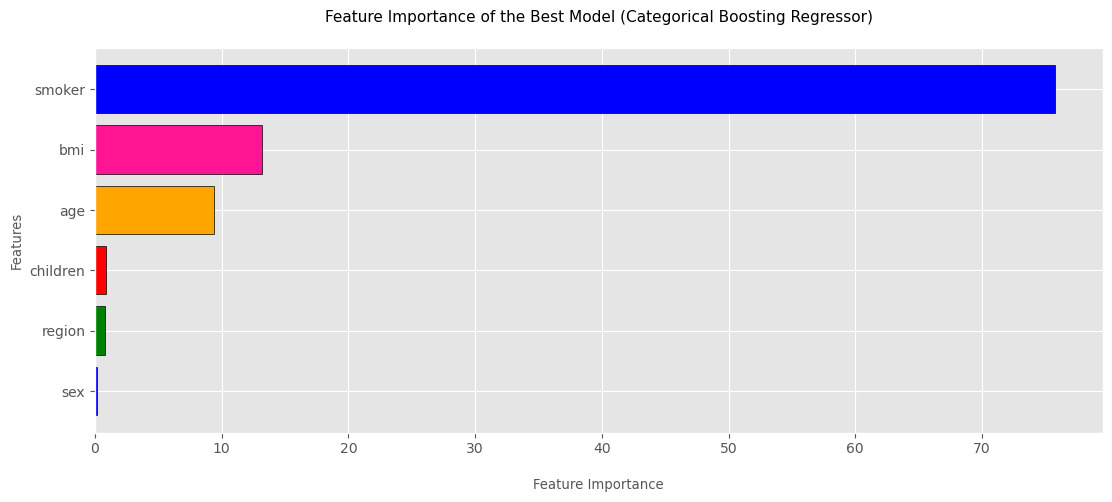

In [264]:
catboost_model = cat_boost_model.best_estimator_
feature_importances = catboost_model.get_feature_importance()

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = x_train.columns[sorted_indices]

plt.figure(figsize=(13, 5))
plt.barh(np.arange(len(sorted_importances)), sorted_importances, 
         color=['blue', 'deeppink', 'orange', 'red','green'], 
         edgecolor='black')
plt.yticks(np.arange(len(sorted_importances)), sorted_features)
plt.xlabel('\nFeature Importance', fontsize=9.5)
plt.ylabel('Features', fontsize=9.5)
plt.title('Feature Importance of the Best Model (Categorical Boosting Regressor)\n', fontsize=11)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

# Conclusion

###
## 1. Smoking Status
The most influential factor by far is the patient's **smoking status**, with a feature importance score over 60. This indicates that whether a patient smokes or not is the single biggest driver of their hospital charges. Smoking is well-known to be associated with a wide range of serious health problems that require more frequent and intensive medical treatment, leading to higher overall costs. This aligns with the expectation that a patient's lifestyle choices and health behaviors would be a primary determinant of their healthcare utilization and expenditures.

## 2. BMI
The next most important factor is the patient's **body mass index (BMI)**, with a feature importance around 20. This suggests that a patient's weight and body composition play a significant role in shaping their hospital charges. Individuals with higher BMIs, indicating overweight or obesity, often have increased susceptibility to chronic conditions like heart disease, diabetes, and certain cancers. The medical complications arising from excess weight can necessitate more intensive and frequent medical interventions, driving up associated costs.

## 3. Age
The patient's **age** is the third most important variable, with a feature importance around 15. As people get older, they tend to develop more health issues and require more frequent healthcare services. Older patients are more likely to have age-related conditions like cardiovascular problems, joint issues, and cognitive decline, which can lead to higher hospital utilization and charges. This finding underscores the relationship between a patient's stage of life and their healthcare needs and costs.

## 4. Children
Whether the patient **has children** has a relatively low feature importance, under 5. This suggests that the presence of dependents does not substantially influence a patient's hospital charges on its own, at least compared to the other key factors. While having children may affect a person's overall healthcare usage and expenses, it does not appear to be a dominant driver of inpatient costs specifically.

## 5. Region
The **region** variable was not included in the feature importance plot, indicating it had minimal impact on the model's predictions of hospital charges. This implies that geographic location and regional variations in healthcare systems, costs, and utilization patterns play a less significant role than the personal characteristics of the patient in determining their inpatient expenses.

## 6. Sex
Interestingly, a patient's **sex** has the lowest feature importance, under 2. This suggests that gender is not a major determinant of hospital charges compared to lifestyle, age, and health status factors. Medical needs and costs seem to be more heavily influenced by these other personal attributes than biological sex alone.

In summary, the key takeaway is that a patient's smoking habits, body mass index, and age are the most influential factors driving their hospital charges, while the presence of children, geographic region, and biological sex play a less significant role. Understanding these relative importance levels can help healthcare providers and payers better target interventions and allocate resources to address the primary cost drivers for inpatient care.

Please let me know if you have any other questions or if you would like me to elaborate further on any part of this analysis. I'm happy to dive deeper into the implications of these findings and how they can inform healthcare decision-making.